In [32]:
import pandas as pd
df=pd.read_excel(r"C:\Users\mark kevin\cleaned_data.xlsx")
df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,918657026628,9.195528e+11,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,918657026625,9.172755e+11,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,918657026629,9.194307e+11,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,918657026623,9.183493e+11,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,918657026624,9.170547e+11,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal


In [33]:
df.dtypes

Call Id                                int64
Lead Id                                int64
Campaign ID                            int64
Advertiser Id                          int64
Hid                                   object
Call Status                           object
Lead Status                           object
Agent Duration(seconds)                int64
Customer Duration(seconds)             int64
From Calling Number                   object
To Calling Number                    float64
Attempt No                             int64
Created At                    datetime64[ns]
Updated At                    datetime64[ns]
Agent Id                               int64
Agent Name                            object
dtype: object

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare time series data for call volume
call_volume_series = df.set_index('Created At').resample('D')['Call Id'].count()

# Fit ARIMA model
model = ARIMA(call_volume_series, order=(5, 1, 0)) 
model_fit = model.fit()

# Forecast for the next 30 days
forecast_call_volume = model_fit.forecast(steps=30)
print("\nCall Volume Forecast for Next 30 Days:")
print(forecast_call_volume)



Call Volume Forecast for Next 30 Days:
2024-05-16    2509.424825
2024-05-17    2100.676233
2024-05-18    2454.459905
2024-05-19    2472.027448
2024-05-20    2397.497573
2024-05-21    2430.438261
2024-05-22    2363.070829
2024-05-23    2412.220674
2024-05-24    2417.631518
2024-05-25    2400.991431
2024-05-26    2410.816206
2024-05-27    2399.997406
2024-05-28    2406.366843
2024-05-29    2408.050189
2024-05-30    2404.581091
2024-05-31    2406.752744
2024-06-01    2405.088325
2024-06-02    2405.809847
2024-06-03    2406.263331
2024-06-04    2405.577596
2024-06-05    2405.996150
2024-06-06    2405.756657
2024-06-07    2405.814351
2024-06-08    2405.922909
2024-06-09    2405.793480
2024-06-10    2405.867057
2024-06-11    2405.836180
2024-06-12    2405.834558
2024-06-13    2405.858351
2024-06-14    2405.834960
Freq: D, Name: predicted_mean, dtype: float64


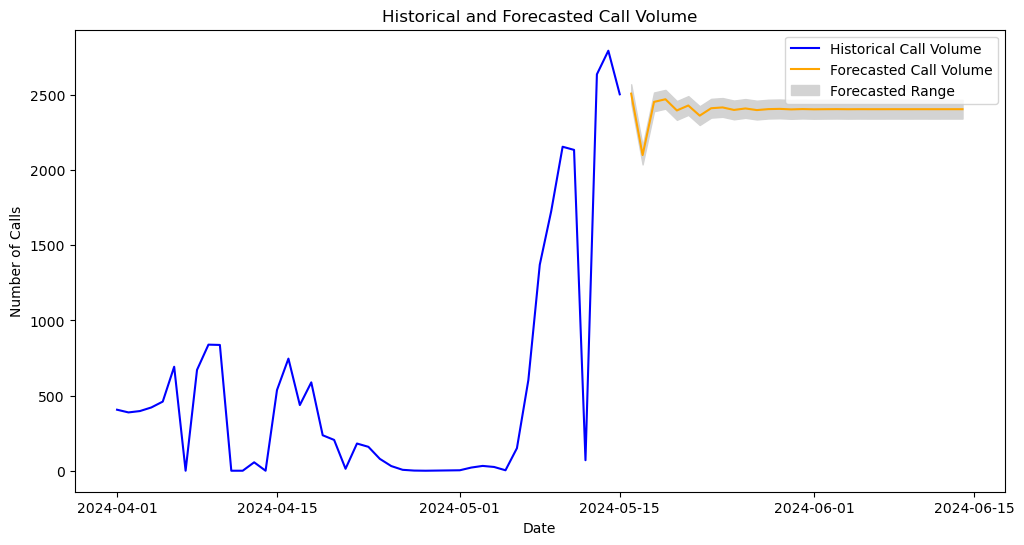

In [35]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

call_volume_series = df.set_index('Created At').resample('D')['Call Id'].count()

# Fit ARIMA model
model = ARIMA(call_volume_series, order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()

# Forecast for the next 30 days
forecast_call_volume = model_fit.forecast(steps=30)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(call_volume_series.index, call_volume_series, label='Historical Call Volume', color='blue')
plt.plot(forecast_call_volume.index, forecast_call_volume, label='Forecasted Call Volume', color='orange')
plt.fill_between(forecast_call_volume.index, forecast_call_volume - forecast_call_volume.std(), forecast_call_volume + forecast_call_volume.std(), color='lightgrey', label='Forecasted Range')
plt.title('Historical and Forecasted Call Volume')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()


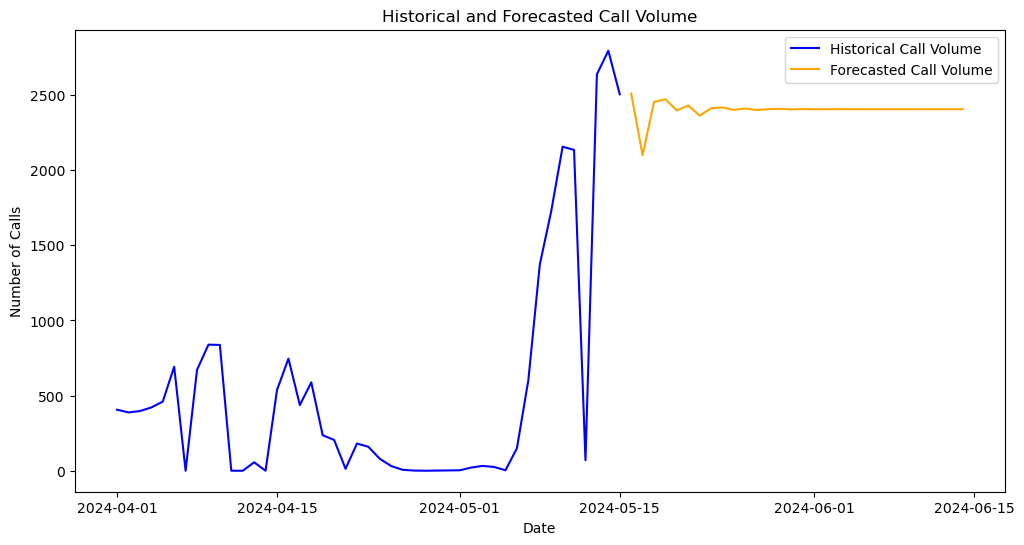


Forecasted Call Volume for Next 30 Days:
2024-05-16    2509.424825
2024-05-17    2100.676233
2024-05-18    2454.459905
2024-05-19    2472.027448
2024-05-20    2397.497573
2024-05-21    2430.438261
2024-05-22    2363.070829
2024-05-23    2412.220674
2024-05-24    2417.631518
2024-05-25    2400.991431
2024-05-26    2410.816206
2024-05-27    2399.997406
2024-05-28    2406.366843
2024-05-29    2408.050189
2024-05-30    2404.581091
2024-05-31    2406.752744
2024-06-01    2405.088325
2024-06-02    2405.809847
2024-06-03    2406.263331
2024-06-04    2405.577596
2024-06-05    2405.996150
2024-06-06    2405.756657
2024-06-07    2405.814351
2024-06-08    2405.922909
2024-06-09    2405.793480
2024-06-10    2405.867057
2024-06-11    2405.836180
2024-06-12    2405.834558
2024-06-13    2405.858351
2024-06-14    2405.834960
Freq: D, Name: predicted_mean, dtype: float64


In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare time series data for call volume
call_volume_series = df.set_index('Created At').resample('D')['Call Id'].count()

# Fit ARIMA model
model = ARIMA(call_volume_series, order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()

# Forecast for the next 30 days
forecast_call_volume = model_fit.forecast(steps=30)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(call_volume_series.index, call_volume_series, label='Historical Call Volume', color='blue')
plt.plot(forecast_call_volume.index, forecast_call_volume, label='Forecasted Call Volume', color='orange')
plt.title('Historical and Forecasted Call Volume')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()

# Print the forecasted call volume for the next 30 days
print("\nForecasted Call Volume for Next 30 Days:")
print(forecast_call_volume)


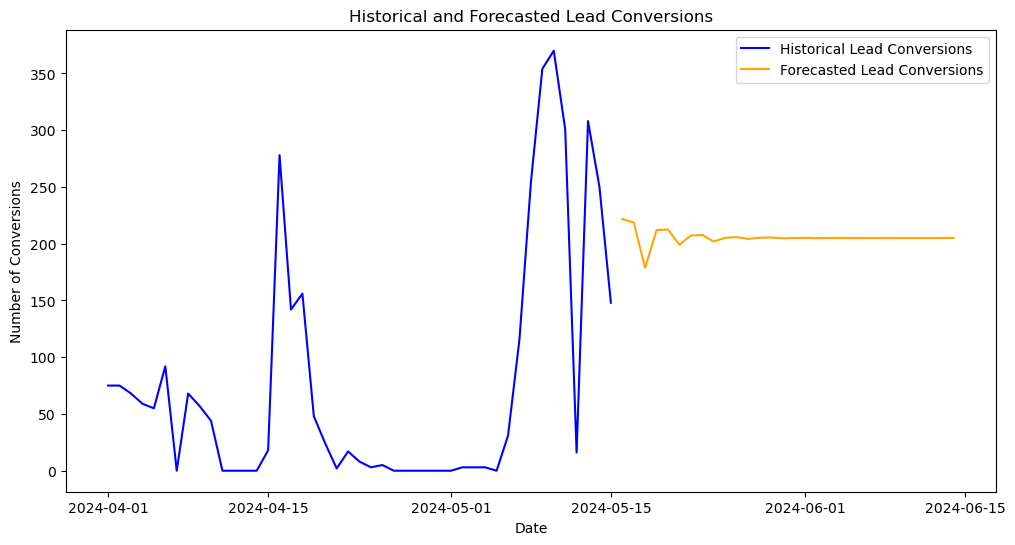


Forecasted Lead Conversions for Next 30 Days:
2024-05-16    221.678483
2024-05-17    218.606606
2024-05-18    178.738030
2024-05-19    211.987410
2024-05-20    212.475694
2024-05-21    198.968307
2024-05-22    207.223132
2024-05-23    207.734559
2024-05-24    201.924792
2024-05-25    205.145318
2024-05-26    205.862292
2024-05-27    204.208827
2024-05-28    205.204050
2024-05-29    205.501017
2024-05-30    204.743064
2024-05-31    205.004378
2024-06-01    205.123334
2024-06-02    204.901316
2024-06-03    205.007307
2024-06-04    205.079470
2024-06-05    204.996212
2024-06-06    205.018507
2024-06-07    205.036866
2024-06-08    205.005654
2024-06-09    205.012784
2024-06-10    205.023963
2024-06-11    205.015393
2024-06-12    205.017829
2024-06-13    205.021307
2024-06-14    205.017524
Freq: D, Name: predicted_mean, dtype: float64


In [38]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Filter data for interested leads
interested_leads = df[df['Lead Status'] == 'Interested']

# Prepare time series data for lead conversion
lead_conversion_series = interested_leads.set_index('Created At').resample('D').size()

# Fit ARIMA model
model = ARIMA(lead_conversion_series, order=(5, 1, 0))  
model_fit = model.fit()

# Forecast for the next 30 days
forecast_lead_conversion = model_fit.forecast(steps=30)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lead_conversion_series.index, lead_conversion_series, label='Historical Lead Conversions', color='blue')
plt.plot(forecast_lead_conversion.index, forecast_lead_conversion, label='Forecasted Lead Conversions', color='orange')
plt.title('Historical and Forecasted Lead Conversions')
plt.xlabel('Date')
plt.ylabel('Number of Conversions')
plt.legend()
plt.show()

# Print the forecasted lead conversions for the next 30 days
print("\nForecasted Lead Conversions for Next 30 Days:")
print(forecast_lead_conversion)


In [39]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare time series data for agent performance metrics
calls_per_hour_series = df.set_index('Created At').resample('H').size()
success_rate_series = df.set_index('Created At').resample('H')['Lead Status'].apply(lambda x: (x == 'Interested').mean())
avg_handling_time_series = df.set_index('Created At').resample('H')['Agent Duration(seconds)'].mean()

# Fit ARIMA model for calls per hour
model_calls_per_hour = ARIMA(calls_per_hour_series, order=(5, 1, 0))  # Adjust the order as needed
model_fit_calls_per_hour = model_calls_per_hour.fit()

# Fit ARIMA model for success rate
model_success_rate = ARIMA(success_rate_series, order=(5, 1, 0))  # Adjust the order as needed
model_fit_success_rate = model_success_rate.fit()

# Fit ARIMA model for average handling time
model_avg_handling_time = ARIMA(avg_handling_time_series, order=(5, 1, 0))  # Adjust the order as needed
model_fit_avg_handling_time = model_avg_handling_time.fit()

# Forecast calls per hour for the next 30 days
forecast_calls_per_hour = model_fit_calls_per_hour.forecast(steps=30)

# Forecast success rate for the next 30 days
forecast_success_rate = model_fit_success_rate.forecast(steps=30)

# Forecast average handling time for the next 30 days
forecast_avg_handling_time = model_fit_avg_handling_time.forecast(steps=30)

# Print the forecasted metrics for the next 30 days
print("\nForecasted Metrics for Next 30 Days:")
print("Calls per Hour:", forecast_calls_per_hour)
print("Success Rate:", forecast_success_rate)
print("Average Handling Time:", forecast_avg_handling_time)



Forecasted Metrics for Next 30 Days:
Calls per Hour: 2024-05-15 20:00:00    60.485618
2024-05-15 21:00:00    80.535856
2024-05-15 22:00:00    48.404789
2024-05-15 23:00:00    61.652308
2024-05-16 00:00:00    90.908873
2024-05-16 01:00:00    87.941462
2024-05-16 02:00:00    78.237071
2024-05-16 03:00:00    84.582840
2024-05-16 04:00:00    86.187555
2024-05-16 05:00:00    80.767598
2024-05-16 06:00:00    80.018311
2024-05-16 07:00:00    82.760554
2024-05-16 08:00:00    82.028622
2024-05-16 09:00:00    81.008533
2024-05-16 10:00:00    81.823341
2024-05-16 11:00:00    82.333614
2024-05-16 12:00:00    81.743720
2024-05-16 13:00:00    81.706991
2024-05-16 14:00:00    81.994826
2024-05-16 15:00:00    81.930223
2024-05-16 16:00:00    81.759343
2024-05-16 17:00:00    81.855893
2024-05-16 18:00:00    81.905535
2024-05-16 19:00:00    81.847597
2024-05-16 20:00:00    81.833764
2024-05-16 21:00:00    81.876653
2024-05-16 22:00:00    81.867350
2024-05-16 23:00:00    81.850285
2024-05-17 00:00:00   

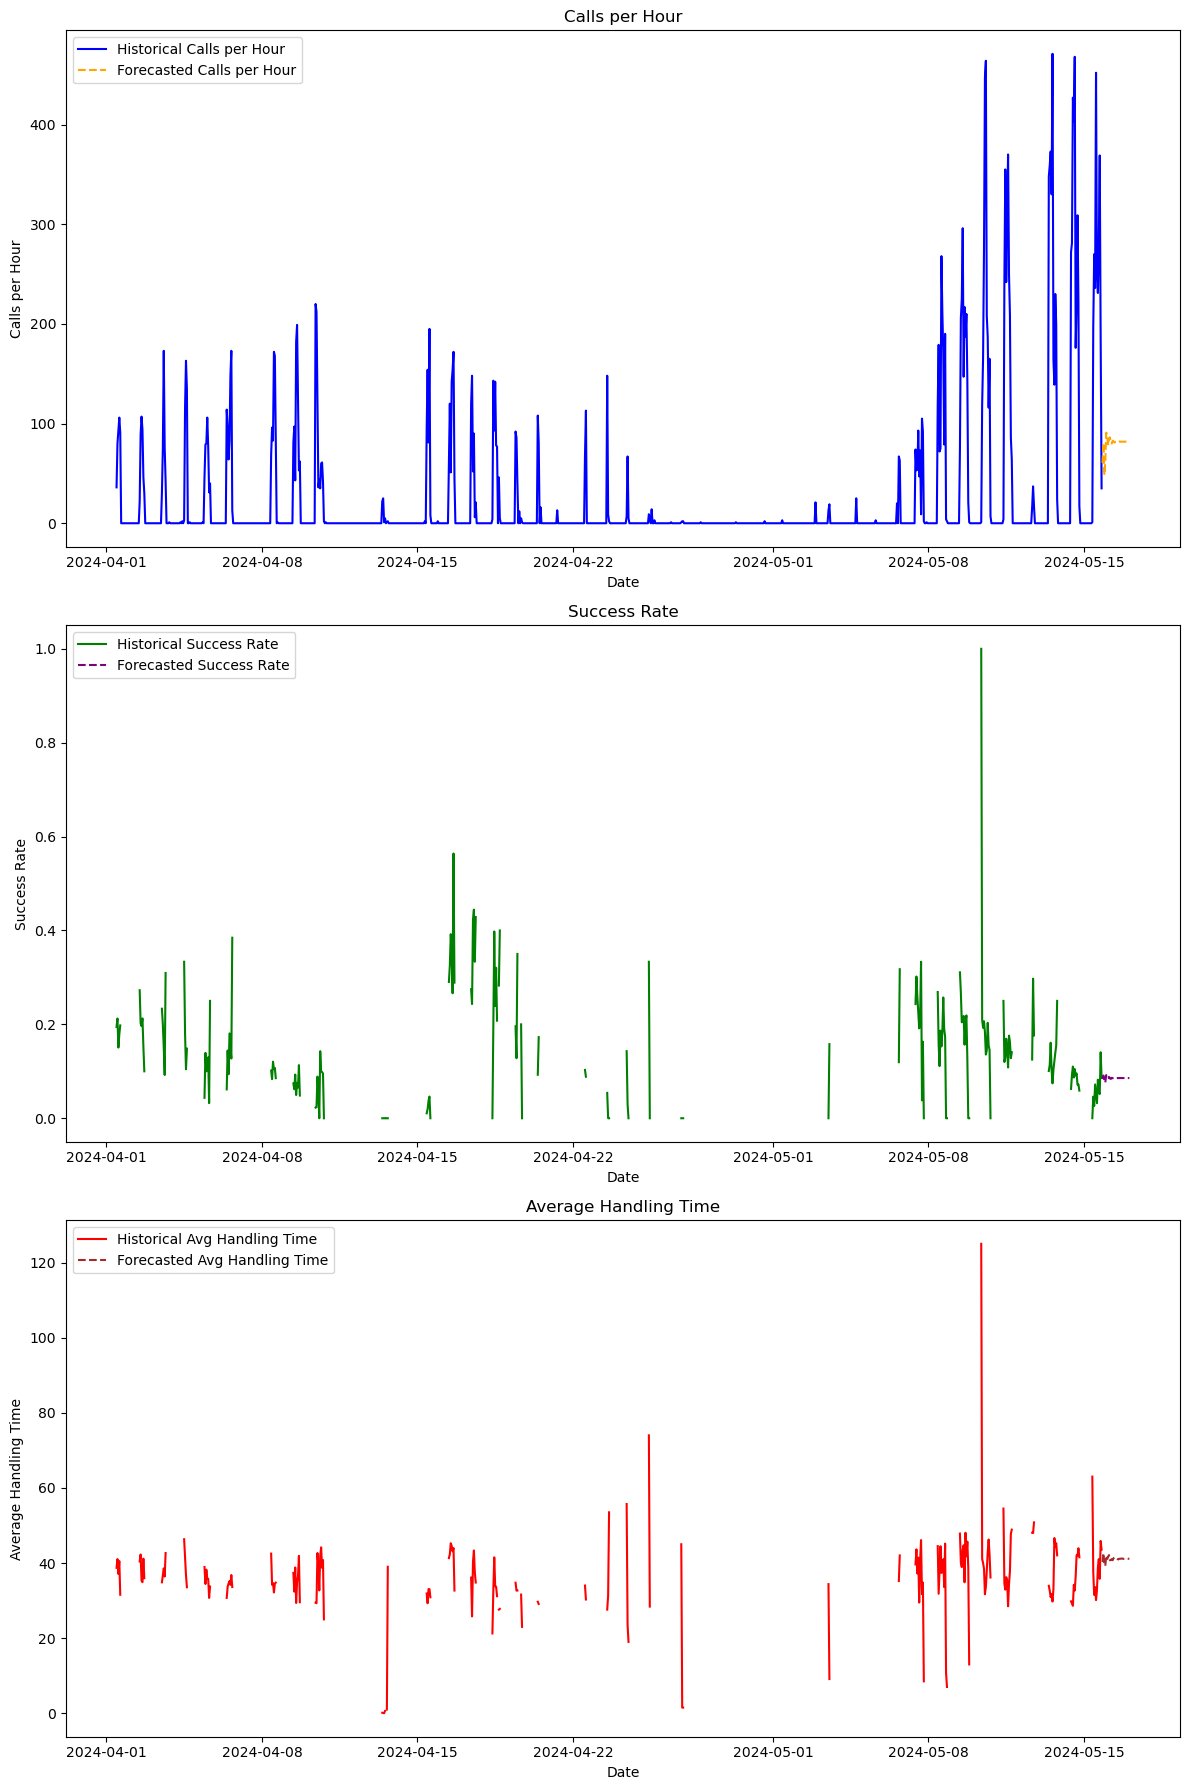


Forecasted Metrics for Next 30 Days:
Calls per Hour: 2024-05-15 20:00:00    60.485618
2024-05-15 21:00:00    80.535856
2024-05-15 22:00:00    48.404789
2024-05-15 23:00:00    61.652308
2024-05-16 00:00:00    90.908873
2024-05-16 01:00:00    87.941462
2024-05-16 02:00:00    78.237071
2024-05-16 03:00:00    84.582840
2024-05-16 04:00:00    86.187555
2024-05-16 05:00:00    80.767598
2024-05-16 06:00:00    80.018311
2024-05-16 07:00:00    82.760554
2024-05-16 08:00:00    82.028622
2024-05-16 09:00:00    81.008533
2024-05-16 10:00:00    81.823341
2024-05-16 11:00:00    82.333614
2024-05-16 12:00:00    81.743720
2024-05-16 13:00:00    81.706991
2024-05-16 14:00:00    81.994826
2024-05-16 15:00:00    81.930223
2024-05-16 16:00:00    81.759343
2024-05-16 17:00:00    81.855893
2024-05-16 18:00:00    81.905535
2024-05-16 19:00:00    81.847597
2024-05-16 20:00:00    81.833764
2024-05-16 21:00:00    81.876653
2024-05-16 22:00:00    81.867350
2024-05-16 23:00:00    81.850285
2024-05-17 00:00:00   

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
axs[0].plot(calls_per_hour_series, label='Historical Calls per Hour', color='blue')
axs[0].plot(forecast_calls_per_hour, label='Forecasted Calls per Hour', color='orange', linestyle='--')
axs[0].set_title('Calls per Hour')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Calls per Hour')
axs[0].legend()

# Plot success rate
axs[1].plot(success_rate_series, label='Historical Success Rate', color='green')
axs[1].plot(forecast_success_rate, label='Forecasted Success Rate', color='purple', linestyle='--')
axs[1].set_title('Success Rate')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Success Rate')
axs[1].legend()

# Plot average handling time
axs[2].plot(avg_handling_time_series, label='Historical Avg Handling Time', color='red')
axs[2].plot(forecast_avg_handling_time, label='Forecasted Avg Handling Time', color='brown', linestyle='--')
axs[2].set_title('Average Handling Time')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Average Handling Time')
axs[2].legend()

plt.tight_layout()
plt.show()

# Print the forecasted metrics for the next 30 days
print("\nForecasted Metrics for Next 30 Days:")
print("Calls per Hour:", forecast_calls_per_hour)
print("Success Rate:", forecast_success_rate)
print("Average Handling Time:", forecast_avg_handling_time)

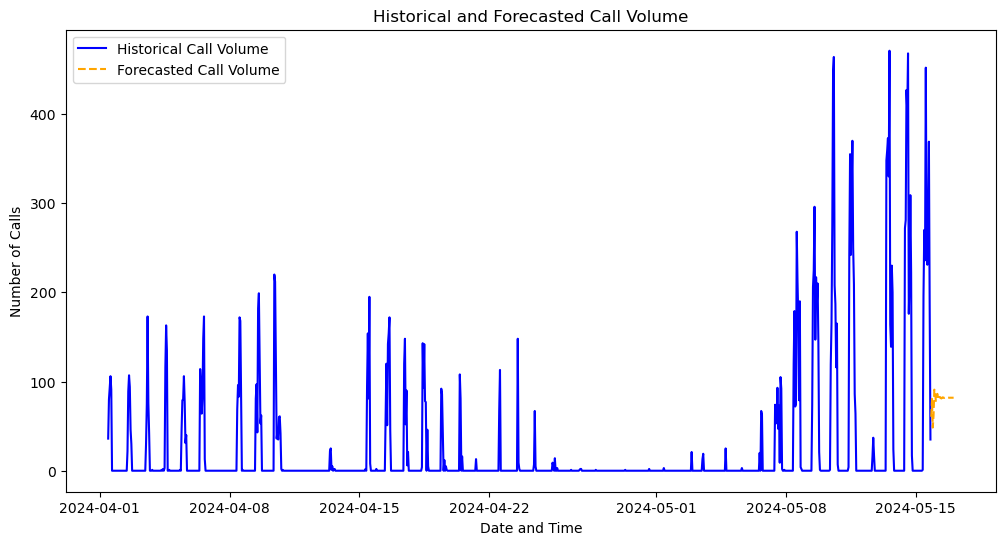


Estimated Number of Agents Required for Next 30 Days:
2024-05-15 20:00:00    0.100809
2024-05-15 21:00:00    0.134226
2024-05-15 22:00:00    0.080675
2024-05-15 23:00:00    0.102754
2024-05-16 00:00:00    0.151515
2024-05-16 01:00:00    0.146569
2024-05-16 02:00:00    0.130395
2024-05-16 03:00:00    0.140971
2024-05-16 04:00:00    0.143646
2024-05-16 05:00:00    0.134613
2024-05-16 06:00:00    0.133364
2024-05-16 07:00:00    0.137934
2024-05-16 08:00:00    0.136714
2024-05-16 09:00:00    0.135014
2024-05-16 10:00:00    0.136372
2024-05-16 11:00:00    0.137223
2024-05-16 12:00:00    0.136240
2024-05-16 13:00:00    0.136178
2024-05-16 14:00:00    0.136658
2024-05-16 15:00:00    0.136550
2024-05-16 16:00:00    0.136266
2024-05-16 17:00:00    0.136426
2024-05-16 18:00:00    0.136509
2024-05-16 19:00:00    0.136413
2024-05-16 20:00:00    0.136390
2024-05-16 21:00:00    0.136461
2024-05-16 22:00:00    0.136446
2024-05-16 23:00:00    0.136417
2024-05-17 00:00:00    0.136430
2024-05-17 01:00:

In [40]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare time series data for call volume
call_volume_series = df.set_index('Created At').resample('H').size()

# Fit ARIMA model for call volume
model_call_volume = ARIMA(call_volume_series, order=(5, 1, 0))  # Adjust the order as needed
model_fit_call_volume = model_call_volume.fit()

# Forecast call volume for the next 30 days
forecast_call_volume = model_fit_call_volume.forecast(steps=30)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(call_volume_series, label='Historical Call Volume', color='blue')
plt.plot(forecast_call_volume, label='Forecasted Call Volume', color='orange', linestyle='--')
plt.title('Historical and Forecasted Call Volume')
plt.xlabel('Date and Time')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()

target_calls_per_hour = 100   
target_success_rate = 0.8 
target_avg_handling_time = 10 

# Calculate the total handling time required for the forecasted call volume
total_handling_time = forecast_call_volume * target_avg_handling_time / 60  # Convert minutes to hours

# Estimate the number of agents required based on target performance levels
agents_required = total_handling_time / target_calls_per_hour

print("\nEstimated Number of Agents Required for Next 30 Days:")
print(agents_required)


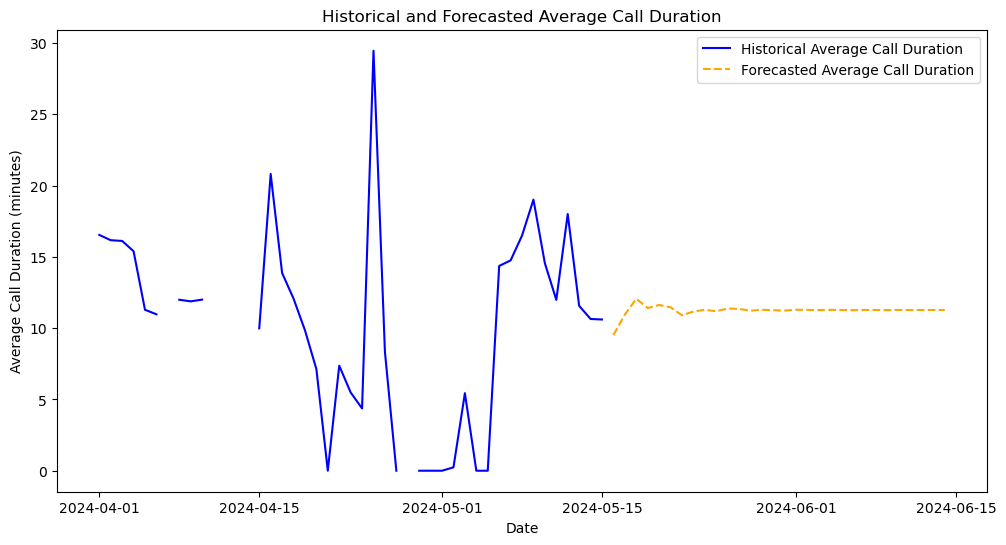


Forecasted Average Call Duration for Next 30 Days:
2024-05-16     9.513468
2024-05-17    10.948508
2024-05-18    12.061607
2024-05-19    11.411519
2024-05-20    11.622193
2024-05-21    11.464741
2024-05-22    10.899898
2024-05-23    11.165747
2024-05-24    11.282883
2024-05-25    11.183877
2024-05-26    11.376653
2024-05-27    11.345227
2024-05-28    11.221923
2024-05-29    11.283860
2024-05-30    11.256566
2024-05-31    11.228326
2024-06-01    11.288156
2024-06-02    11.276570
2024-06-03    11.261538
2024-06-04    11.282418
2024-06-05    11.265993
2024-06-06    11.259774
2024-06-07    11.273036
2024-06-08    11.266477
2024-06-09    11.266580
2024-06-10    11.272826
2024-06-11    11.267629
2024-06-12    11.267479
2024-06-13    11.270017
2024-06-14    11.267321
Freq: D, Name: predicted_mean, dtype: float64


In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with call data
# Example DataFrame
# df = pd.read_csv('your_data.csv')

# Convert 'created_at' to datetime if it's not already in datetime format
df['Created At'] = pd.to_datetime(df['Created At'])

# Prepare time series data for average call duration
average_call_duration_series = df.set_index('Created At').resample('D')['Customer Duration(seconds)'].mean()

# Fit ARIMA model for average call duration
model_avg_call_duration = ARIMA(average_call_duration_series, order=(5, 1, 0))  # Adjust the order as needed
model_fit_avg_call_duration = model_avg_call_duration.fit()

# Forecast average call duration for the next 30 days
forecast_avg_call_duration = model_fit_avg_call_duration.forecast(steps=30)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_call_duration_series, label='Historical Average Call Duration', color='blue')
plt.plot(forecast_avg_call_duration, label='Forecasted Average Call Duration', color='orange', linestyle='--')
plt.title('Historical and Forecasted Average Call Duration')
plt.xlabel('Date')
plt.ylabel('Average Call Duration (minutes)')
plt.legend()
plt.show()

# Print the forecasted average call duration for the next 30 days
print("\nForecasted Average Call Duration for Next 30 Days:")
print(forecast_avg_call_duration)
